# Wine

資料集:<br>
Wine_data<br>
https://www.kaggle.com/datasets/akhil0007/wine-data

SVM


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


One-vs-One Accuracy: 0.9444444444444444
One-vs-One Precision: 0.9521367521367522
One-vs-One Recall: 0.9373219373219372
One-vs-One F1 Score: 0.9432568783481562
One-vs-One Cohen's Kappa: 0.914792899408284

One-vs-All Accuracy: 0.9444444444444444
One-vs-All Precision: 0.9521367521367522
One-vs-All Recall: 0.9373219373219372
One-vs-All F1 Score: 0.9432568783481562
One-vs-All Cohen's Kappa: 0.914792899408284

Many-vs-Many Accuracy: 0.7222222222222222
Many-vs-Many Precision: 0.5105908584169454
Many-vs-Many Recall: 0.6410256410256411
Many-vs-Many F1 Score: 0.5599445599445599
Many-vs-Many Cohen's Kappa: 0.5527950310559007


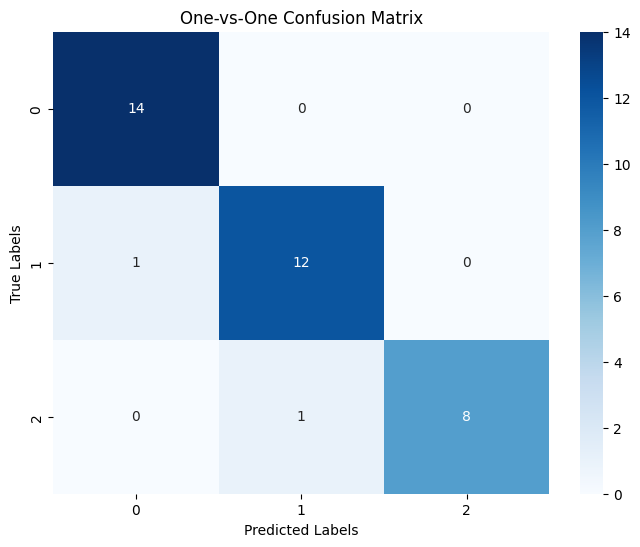

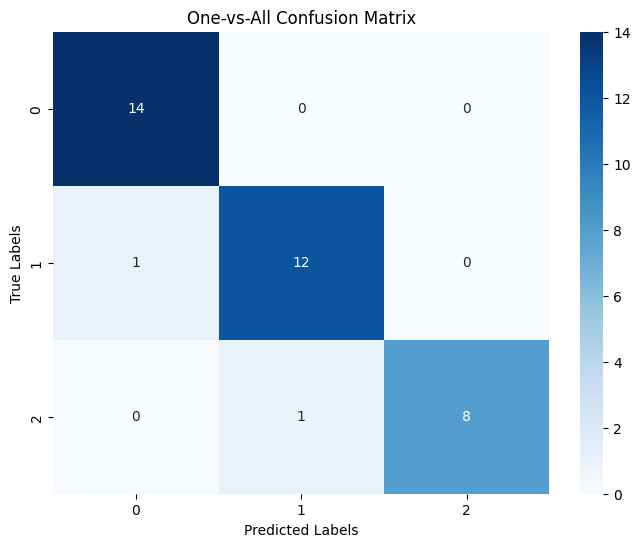

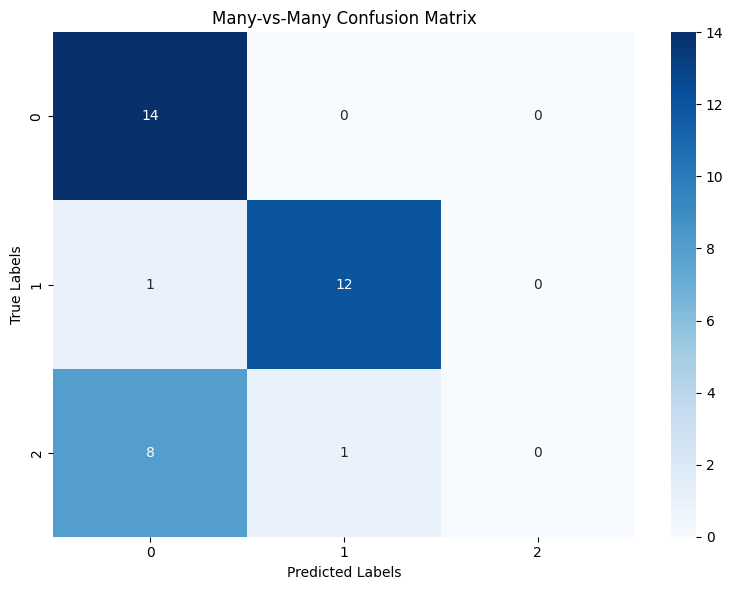

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取數據集
df = pd.read_csv('/content/drive/MyDrive/wine.data', header=None)

# 提取特徵和標籤 (修改)
X = df.iloc[:, 1:].values  # 提取特徵，從第二欄開始到最後一欄
y = df.iloc[:, 0].values  # 提取標籤，第一欄


# 創建SVM模型
svm = SVC(C =1, kernel= 'linear', degree=2,random_state=1, probability= True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 一對一法（One-vs-One）
ovo = OneVsOneClassifier(svm)
ovo.fit(X_train, y_train)
ovo_pred = ovo.predict(X_test)
ovo_accuracy = accuracy_score(y_test, ovo_pred)
ovo_precision = precision_score(y_test, ovo_pred, average='macro')
ovo_recall = recall_score(y_test, ovo_pred, average='macro')
ovo_f1 = f1_score(y_test, ovo_pred, average='macro')
ovo_cm = confusion_matrix(y_test, ovo_pred)
ovo_kappa = cohen_kappa_score(y_test, ovo_pred)

# 一對多法（One-vs-All）
ova = OneVsRestClassifier(svm)
ova.fit(X_train, y_train)
ova_pred = ova.predict(X_test)
ova_accuracy = accuracy_score(y_test, ova_pred)
ova_precision = precision_score(y_test, ova_pred, average='macro')
ova_recall = recall_score(y_test, ova_pred, average='macro')
ova_f1 = f1_score(y_test, ova_pred, average='macro')
ova_cm = confusion_matrix(y_test, ova_pred)
ova_kappa = cohen_kappa_score(y_test, ova_pred)

# 多對多法（Many-vs-Many）
mvc = OutputCodeClassifier(svm)
mvc.fit(X_train, y_train)
mvc_pred = mvc.predict(X_test)
mvc_accuracy = accuracy_score(y_test, mvc_pred)
mvc_precision = precision_score(y_test, mvc_pred, average='macro')
mvc_recall = recall_score(y_test, mvc_pred, average='macro')
mvc_f1 = f1_score(y_test, mvc_pred, average='macro')
mvc_cm = confusion_matrix(y_test, mvc_pred)
mvc_kappa = cohen_kappa_score(y_test, mvc_pred)

# 打印評估結果
print("One-vs-One Accuracy:", ovo_accuracy)
print("One-vs-One Precision:", ovo_precision)
print("One-vs-One Recall:", ovo_recall)
print("One-vs-One F1 Score:", ovo_f1)
print("One-vs-One Cohen's Kappa:", ovo_kappa)
print()
print("One-vs-All Accuracy:", ova_accuracy)
print("One-vs-All Precision:", ova_precision)
print("One-vs-All Recall:", ova_recall)
print("One-vs-All F1 Score:", ova_f1)
print("One-vs-All Cohen's Kappa:", ova_kappa)
print()
print("Many-vs-Many Accuracy:", mvc_accuracy)
print("Many-vs-Many Precision:", mvc_precision)
print("Many-vs-Many Recall:", mvc_recall)
print("Many-vs-Many F1 Score:", mvc_f1)
print("Many-vs-Many Cohen's Kappa:", mvc_kappa)

#繪製混淆矩陣熱力圖
plt.figure(figsize=(8, 6))
sns.heatmap(ovo_cm, annot=True, cmap='Blues', fmt='d')
plt.title('One-vs-One Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.figure(figsize=(8, 6))
sns.heatmap(ova_cm, annot=True, cmap='Blues', fmt='d')
plt.title('One-vs-All Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.figure(figsize=(8, 6))
sns.heatmap(mvc_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Many-vs-Many Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

## GirdSearchCV最佳化

In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取數據集
df = pd.read_csv('/content/drive/MyDrive/wine.data', header=None)

# 提取特徵和標籤 (修改)
X = df.iloc[:, 1:].values  # 提取特徵，從第二欄開始到最後一欄
y = df.iloc[:, 0].values  # 提取標籤，第一欄


# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 創建SVM模型
svm = SVC(random_state=1, probability=True)

# 定義參數網格
param_grid = {
    'estimator__C': [0.1, 1, 10], #容錯範圍
    'estimator__kernel': ['linear', 'rbf', 'poly'], #內核類型
    'estimator__degree': [2, 3, 4] #多項式核函數的次數
}

# 一對一法（One-vs-One）
ovo = OneVsOneClassifier(svm)
grid_search_ovo = GridSearchCV(estimator=ovo, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search_ovo.fit(X_train, y_train)
best_model_ovo = grid_search_ovo.best_estimator_
ovo_pred = best_model_ovo.predict(X_test)

# 一對其餘（One-vs-Rest）
ovr = OneVsRestClassifier(svm)
grid_search_ovr = GridSearchCV(estimator=ovr, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search_ovr.fit(X_train, y_train)
best_model_ovr = grid_search_ovr.best_estimator_
ovr_pred = best_model_ovr.predict(X_test)

# 多輸出編碼（OutputCode）
mvm = OutputCodeClassifier(svm)
grid_search_mvm = GridSearchCV(estimator=mvm, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search_mvm.fit(X_train, y_train)
best_model_mvm = grid_search_mvm.best_estimator_
mvm_pred = best_model_mvm.predict(X_test)

# 計算評估指標
ovo_accuracy = accuracy_score(y_test, ovo_pred)
ovo_precision = precision_score(y_test, ovo_pred, average='macro')
ovo_recall = recall_score(y_test, ovo_pred, average='macro')
ovo_f1 = f1_score(y_test, ovo_pred, average='macro')
ovo_cm = confusion_matrix(y_test, ovo_pred)
ovo_kappa = cohen_kappa_score(y_test, ovo_pred)

ovr_accuracy = accuracy_score(y_test, ovr_pred)
ovr_precision = precision_score(y_test, ovr_pred, average='macro')
ovr_recall = recall_score(y_test, ovr_pred, average='macro')
ovr_f1 = f1_score(y_test, ovr_pred, average='macro')
ovr_cm = confusion_matrix(y_test, ovr_pred)
ovr_kappa = cohen_kappa_score(y_test, ovr_pred)

mvm_accuracy = accuracy_score(y_test, mvm_pred)
mvm_precision = precision_score(y_test, mvm_pred, average='macro')
mvm_recall = recall_score(y_test, mvm_pred, average='macro')
mvm_f1 = f1_score(y_test, mvm_pred, average='macro')
mvm_cm = confusion_matrix(y_test, mvm_pred)
mvm_kappa = cohen_kappa_score(y_test, mvm_pred)

# 打印結果
print("一對一法（One-vs-One）:")
print("最佳模型參數：", grid_search_ovo.best_params_)
print("準確率：", ovo_accuracy)
print("精確度：", ovo_precision)
print("召回率：", ovo_recall)
print("F1值：", ovo_f1)
print("混淆矩陣：\n", ovo_cm)
print("Kappa係數：", ovo_kappa)

print("\n一對其餘（One-vs-Rest）:")
print("最佳模型參數：", grid_search_ovr.best_params_)
print("準確率：", ovr_accuracy)
print("精確度：", ovr_precision)
print("召回率：", ovr_recall)
print("F1值：", ovr_f1)
print("混淆矩陣：\n", ovr_cm)
print("Kappa係數：", ovr_kappa)

print("\n多輸出編碼（OutputCode）:")
print("最佳模型參數：", grid_search_mvm.best_params_)
print("準確率：", mvm_accuracy)
print("精確度：", mvm_precision)
print("召回率：", mvm_recall)
print("F1值：", mvm_f1)
print("混淆矩陣：\n", mvm_cm)
print("Kappa係數：", mvm_kappa)

一對一法（One-vs-One）:
最佳模型參數： {'estimator__C': 0.1, 'estimator__degree': 2, 'estimator__kernel': 'linear'}
準確率： 0.9444444444444444
精確度： 0.9555555555555556
召回率： 0.9391534391534391
F1值： 0.9442369540408757
混淆矩陣：
 [[13  1  0]
 [ 0 13  0]
 [ 0  1  8]]
Kappa係數： 0.9149940968122786

一對其餘（One-vs-Rest）:
最佳模型參數： {'estimator__C': 0.1, 'estimator__degree': 2, 'estimator__kernel': 'linear'}
準確率： 0.9444444444444444
精確度： 0.9521367521367522
召回率： 0.9373219373219372
F1值： 0.9432568783481562
混淆矩陣：
 [[14  0  0]
 [ 1 12  0]
 [ 0  1  8]]
Kappa係數： 0.914792899408284

多輸出編碼（OutputCode）:
最佳模型參數： {'estimator__C': 0.1, 'estimator__degree': 4, 'estimator__kernel': 'linear'}
準確率： 0.6944444444444444
精確度： 0.49134199134199136
召回率： 0.6172161172161172
F1值： 0.5380952380952381
混淆矩陣：
 [[13  1  0]
 [ 1 12  0]
 [ 0  9  0]]
Kappa係數： 0.5135135135135135


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RandomForest

無最佳化

One-vs-One Accuracy: 0.9722222222222222
One-vs-One Precision: 0.9777777777777779
One-vs-One Recall: 0.9743589743589745
One-vs-One F1 Score: 0.9751724137931035
One-vs-One Cohen's Kappa: 0.9575971731448764

One-vs-All Accuracy: 0.9722222222222222
One-vs-All Precision: 0.9777777777777779
One-vs-All Recall: 0.9743589743589745
One-vs-All F1 Score: 0.9751724137931035
One-vs-All Cohen's Kappa: 0.9575971731448764

Many-vs-Many Accuracy: 0.9722222222222222
Many-vs-Many Precision: 0.9777777777777779
Many-vs-Many Recall: 0.9743589743589745
Many-vs-Many F1 Score: 0.9751724137931035
Many-vs-Many Cohen's Kappa: 0.9575971731448764


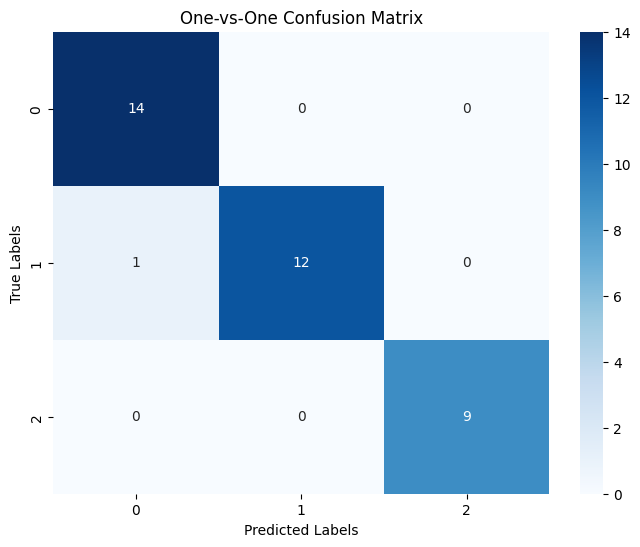

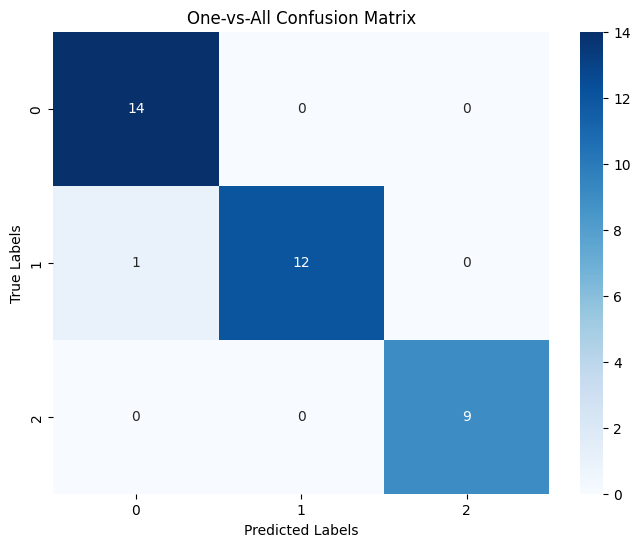

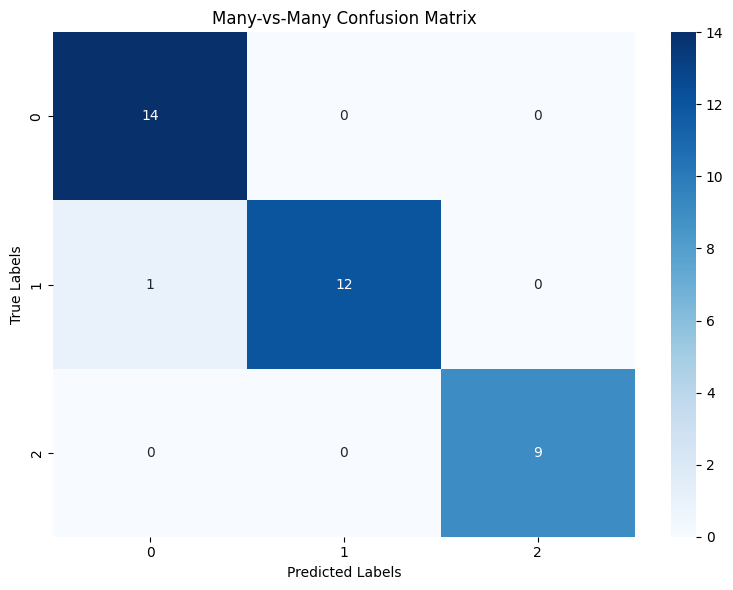

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取數據集
df = pd.read_csv('/content/drive/MyDrive/wine.data', header=None)

# 提取特徵和標籤 (修改)
X = df.iloc[:, 1:].values  # 提取特徵，從第二欄開始到最後一欄
y = df.iloc[:, 0].values  # 提取標籤，第一欄

# 創建隨機森林模型
rf_model = RandomForestClassifier(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# 一對一法（One-vs-One）
ovo = OneVsOneClassifier(rf_model)
ovo.fit(X_train, y_train)
ovo_pred = ovo.predict(X_test)
ovo_accuracy = accuracy_score(y_test, ovo_pred)
ovo_precision = precision_score(y_test, ovo_pred, average='macro')
ovo_recall = recall_score(y_test, ovo_pred, average='macro')
ovo_f1 = f1_score(y_test, ovo_pred, average='macro')
ovo_cm = confusion_matrix(y_test, ovo_pred)
ovo_kappa = cohen_kappa_score(y_test, ovo_pred)

# 一對多法（One-vs-All）
ova = OneVsRestClassifier(rf_model)
ova.fit(X_train, y_train)
ova_pred = ova.predict(X_test)
ova_accuracy = accuracy_score(y_test, ova_pred)
ova_precision = precision_score(y_test, ova_pred, average='macro')
ova_recall = recall_score(y_test, ova_pred, average='macro')
ova_f1 = f1_score(y_test, ova_pred, average='macro')
ova_cm = confusion_matrix(y_test, ova_pred)
ova_kappa = cohen_kappa_score(y_test, ova_pred)

# 多對多法（Many-vs-Many）
mvc = OutputCodeClassifier(rf_model)
mvc.fit(X_train, y_train)
mvc_pred = mvc.predict(X_test)
mvc_accuracy = accuracy_score(y_test, mvc_pred)
mvc_precision = precision_score(y_test, mvc_pred, average='macro')
mvc_recall = recall_score(y_test, mvc_pred, average='macro')
mvc_f1 = f1_score(y_test, mvc_pred, average='macro')
mvc_cm = confusion_matrix(y_test, mvc_pred)
mvc_kappa = cohen_kappa_score(y_test, mvc_pred)

# 打印評估結果
print("One-vs-One Accuracy:", ovo_accuracy)
print("One-vs-One Precision:", ovo_precision)
print("One-vs-One Recall:", ovo_recall)
print("One-vs-One F1 Score:", ovo_f1)
print("One-vs-One Cohen's Kappa:", ovo_kappa)
print()
print("One-vs-All Accuracy:", ova_accuracy)
print("One-vs-All Precision:", ova_precision)
print("One-vs-All Recall:", ova_recall)
print("One-vs-All F1 Score:", ova_f1)
print("One-vs-All Cohen's Kappa:", ova_kappa)
print()
print("Many-vs-Many Accuracy:", mvc_accuracy)
print("Many-vs-Many Precision:", mvc_precision)
print("Many-vs-Many Recall:", mvc_recall)
print("Many-vs-Many F1 Score:", mvc_f1)
print("Many-vs-Many Cohen's Kappa:", mvc_kappa)

#繪製混淆矩陣熱力圖
plt.figure(figsize=(8, 6))
sns.heatmap(ovo_cm, annot=True, cmap='Blues', fmt='d')
plt.title('One-vs-One Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.figure(figsize=(8, 6))
sns.heatmap(ova_cm, annot=True, cmap='Blues', fmt='d')
plt.title('One-vs-All Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.figure(figsize=(8, 6))
sns.heatmap(mvc_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Many-vs-Many Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()
#print(df)

## GirdSearchCV最佳化

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 讀取數據集
df = pd.read_csv('/content/drive/MyDrive/wine.data', header=None)

# 提取特徵和標籤 (修改)
X = df.iloc[:, 1:].values  # 提取特徵，從第二欄開始到最後一欄
y = df.iloc[:, 0].values  # 提取標籤，第一欄

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# 建立隨機森林模型
rf = RandomForestClassifier(random_state=1, class_weight='balanced')

# 定義參數網格
param_grid = {
    'estimator__n_estimators': [100, 200, 300],  # 決策樹的數量
    'estimator__max_depth': [None, 5, 10],  # 決策樹的最大深度
    'estimator__min_samples_split': [2, 5, 10],  # 內部節點再切分所需的最小樣本數
    'estimator__min_samples_leaf': [1, 2, 4]  # 葉子節點最少樣本數
}

# 一對一法（One-vs-One）
ovo = OneVsOneClassifier(rf)
grid_search_ovo = GridSearchCV(estimator=ovo, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search_ovo.fit(X_train, y_train)
best_model_ovo = grid_search_ovo.best_estimator_
ovo_pred = best_model_ovo.predict(X_test)

# 一對其餘（One-vs-Rest）
ovr = OneVsRestClassifier(rf)
grid_search_ovr = GridSearchCV(estimator=ovr, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search_ovr.fit(X_train, y_train)
best_model_ovr = grid_search_ovr.best_estimator_
ovr_pred = best_model_ovr.predict(X_test)

# 多輸出編碼（OutputCode）
mvm = OutputCodeClassifier(rf)
grid_search_mvm = GridSearchCV(estimator=mvm, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search_mvm.fit(X_train, y_train)
best_model_mvm = grid_search_mvm.best_estimator_
mvm_pred = best_model_mvm.predict(X_test)

# 計算評估指標
ovo_accuracy = accuracy_score(y_test, ovo_pred)
ovo_precision = precision_score(y_test, ovo_pred, average='macro')
ovo_recall = recall_score(y_test, ovo_pred, average='macro')
ovo_f1 = f1_score(y_test, ovo_pred, average='macro')
ovo_cm = confusion_matrix(y_test, ovo_pred)
ovo_kappa = cohen_kappa_score(y_test, ovo_pred)

ovr_accuracy = accuracy_score(y_test, ovr_pred)
ovr_precision = precision_score(y_test, ovr_pred, average='macro')
ovr_recall = recall_score(y_test, ovr_pred, average='macro')
ovr_f1 = f1_score(y_test, ovr_pred, average='macro')
ovr_cm = confusion_matrix(y_test, ovr_pred)
ovr_kappa = cohen_kappa_score(y_test, ovr_pred)

mvm_accuracy = accuracy_score(y_test, mvm_pred)
mvm_precision = precision_score(y_test, mvm_pred, average='macro')
mvm_recall = recall_score(y_test, mvm_pred, average='macro')
mvm_f1 = f1_score(y_test, mvm_pred, average='macro')
mvm_cm = confusion_matrix(y_test, mvm_pred)
mvm_kappa = cohen_kappa_score(y_test, mvm_pred)

# 印出結果
print("一對一法（One-vs-One）:")
print("最佳模型參數：", grid_search_ovo.best_params_)
print("準確率：", ovo_accuracy)
print("精確度：", ovo_precision)
print("召回率：", ovo_recall)
print("F1值：", ovo_f1)
print("混淆矩陣：\n", ovo_cm)
print("Kappa係數：", ovo_kappa)
print("CV 平均準確率：", grid_search_ovo.cv_results_['mean_test_score'].mean())

print("\n一對其餘（One-vs-Rest）:")
print("最佳模型參數：", grid_search_ovr.best_params_)
print("準確率：", ovr_accuracy)
print("精確度：", ovr_precision)
print("召回率：", ovr_recall)
print("F1值：", ovr_f1)
print("混淆矩陣：\n", ovr_cm)
print("Kappa係數：", ovr_kappa)
print("CV 平均準確率：", grid_search_ovr.cv_results_['mean_test_score'].mean())

print("\n多輸出編碼（OutputCode）:")
print("最佳模型參數：", grid_search_mvm.best_params_)
print("準確率：", mvm_accuracy)
print("精確度：", mvm_precision)
print("召回率：", mvm_recall)
print("F1值：", mvm_f1)
print("混淆矩陣：\n", mvm_cm)
print("Kappa係數：", mvm_kappa)
print("CV 平均準確率：", grid_search_mvm.cv_results_['mean_test_score'].mean())


一對一法（One-vs-One）:
最佳模型參數： {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 100}
準確率： 0.9722222222222222
精確度： 0.9777777777777779
召回率： 0.9743589743589745
F1值： 0.9751724137931035
混淆矩陣：
 [[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]
Kappa係數： 0.9575971731448764
CV 平均準確率： 0.9796296296296295

一對其餘（One-vs-Rest）:
最佳模型參數： {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 100}
準確率： 0.9722222222222222
精確度： 0.9777777777777779
召回率： 0.9743589743589745
F1值： 0.9751724137931035
混淆矩陣：
 [[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]
Kappa係數： 0.9575971731448764
CV 平均準確率： 0.98984126984127

多輸出編碼（OutputCode）:
最佳模型參數： {'estimator__max_depth': None, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 200}
準確率： 0.6388888888888888
精確度： 0.5061728395061729
召回率： 0.6666666666666666
F1值： 0.5609756097560975
混淆矩陣：
 [[14  0  0]
 [13  0  0]
 [ 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
